# Chapter 4 - Codeblocks

In [7]:
library(rethinking)
data(Howell1)
d <- Howell1

## Grid Approximation

available summary functions:

In [9]:
str(d)

'data.frame':	544 obs. of  4 variables:
 $ height: num  152 140 137 157 145 ...
 $ weight: num  47.8 36.5 31.9 53 41.3 ...
 $ age   : num  63 63 65 41 51 35 32 27 19 54 ...
 $ male  : int  1 0 0 1 0 1 0 1 0 1 ...


In [10]:
summary(d)

     height           weight            age             male       
 Min.   : 53.98   Min.   : 4.252   Min.   : 0.00   Min.   :0.0000  
 1st Qu.:125.09   1st Qu.:22.008   1st Qu.:12.00   1st Qu.:0.0000  
 Median :148.59   Median :40.058   Median :27.00   Median :0.0000  
 Mean   :138.26   Mean   :35.611   Mean   :29.34   Mean   :0.4724  
 3rd Qu.:157.48   3rd Qu.:47.209   3rd Qu.:43.00   3rd Qu.:1.0000  
 Max.   :179.07   Max.   :62.993   Max.   :88.00   Max.   :1.0000  

In [11]:
head(d)

,height,weight,age,male
,<dbl>,<dbl>,<dbl>,<int>
1,151.765,47.82561,63,1
2,139.700,36.48581,63,0
3,136.525,31.86484,65,0
4,156.845,53.04191,41,1
5,145.415,41.27687,51,0
6,163.830,62.99259,35,1


In [13]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
height,138.2635963,27.6024476,81.108550,165.73500,▁▁▁▁▁▁▁▂▁▇▇▅▁
weight,35.6106176,14.7191782,9.360721,54.50289,▁▂▃▂▂▂▂▅▇▇▃▂▁
age,29.3443934,20.7468882,1.000000,66.13500,▇▅▅▃▅▂▂▁▁
male,0.4724265,0.4996986,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇


### restricting the data to adults

In [14]:
d2 <- d[d$age >= 18, ]

### choosing priors

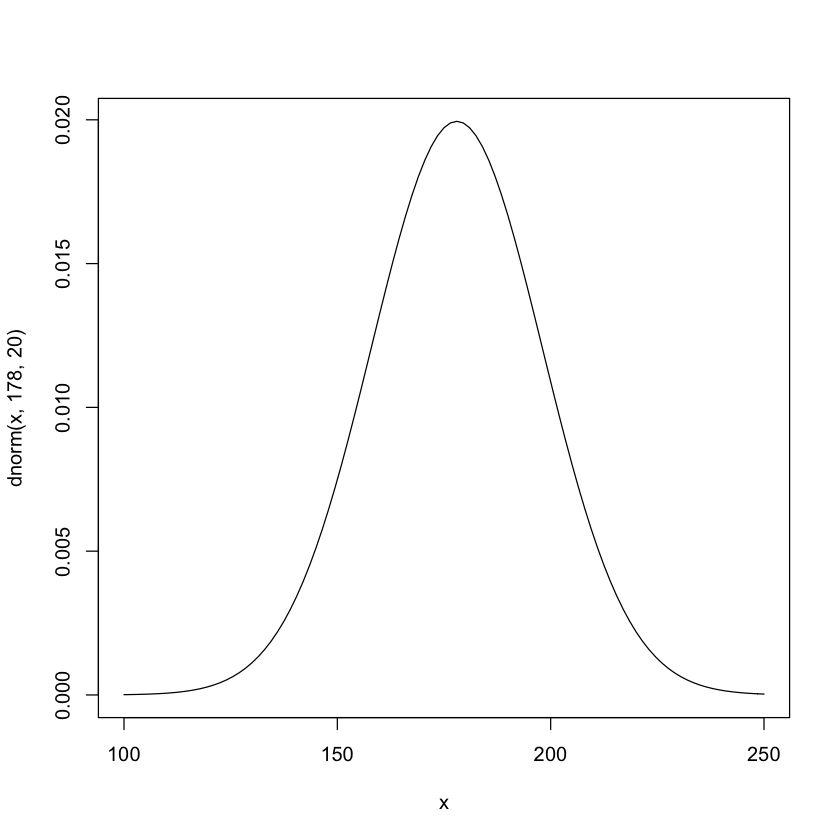

In [31]:
curve(dnorm(x, 178, 20), from=100, to=250)

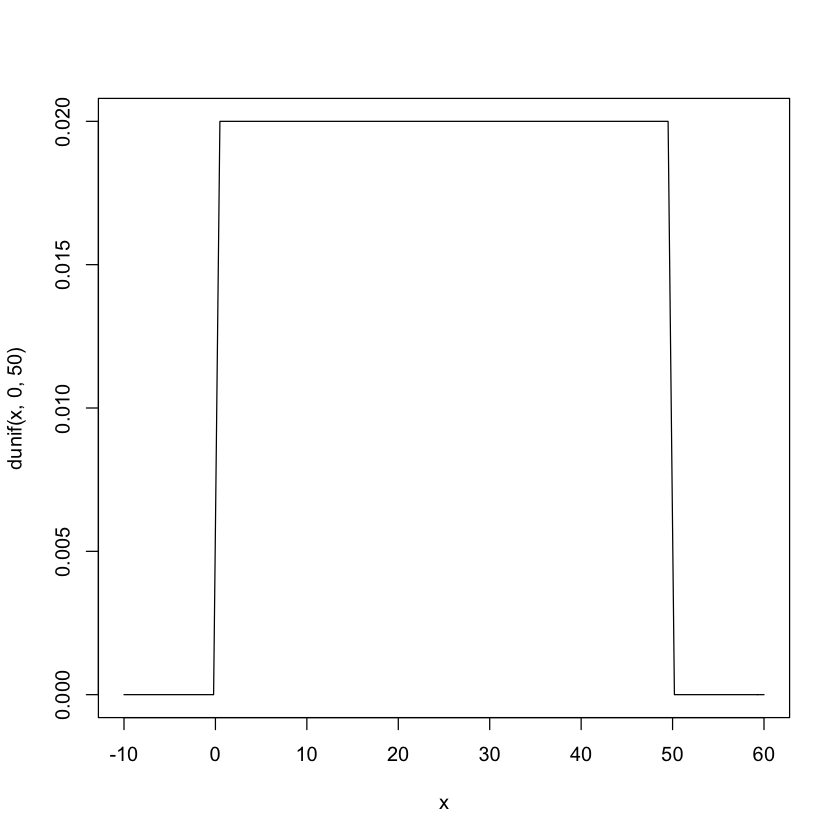

In [32]:
curve(dunif(x, 0, 50), from =-10, to=60)

In [17]:
sample_mu <- rnorm(1e4, 178, 20)
sample_sigma <- runif(1e4, 0, 50)

#### combined prior for body height

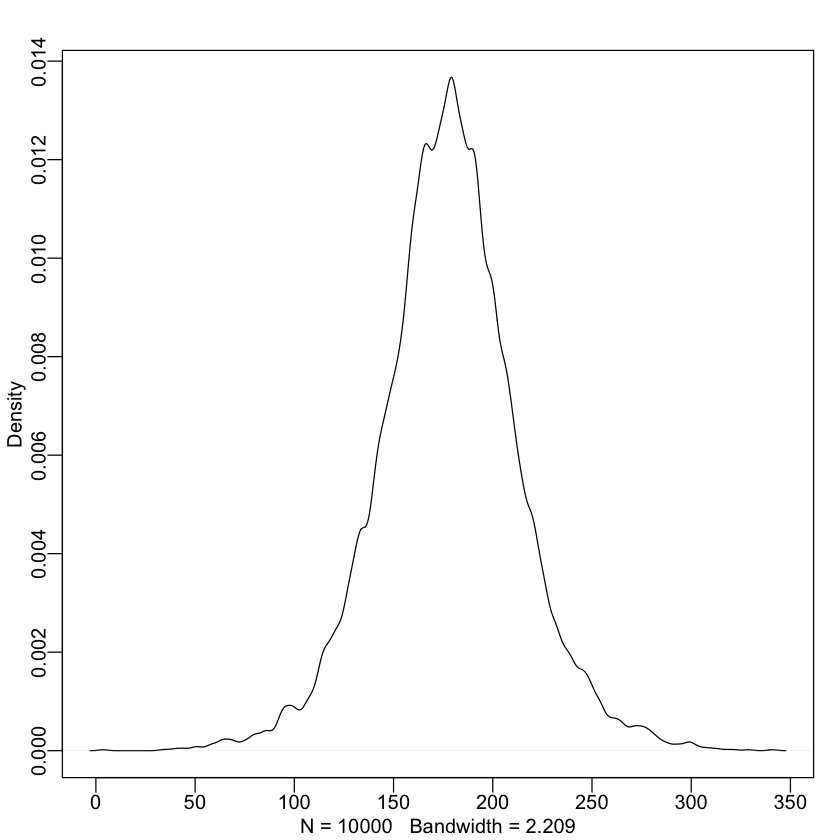

In [18]:
prior_h <- rnorm(1e4, sample_mu, sample_sigma)
dens(prior_h)

#### sampling the combined prior with a large sample_mu_sigma

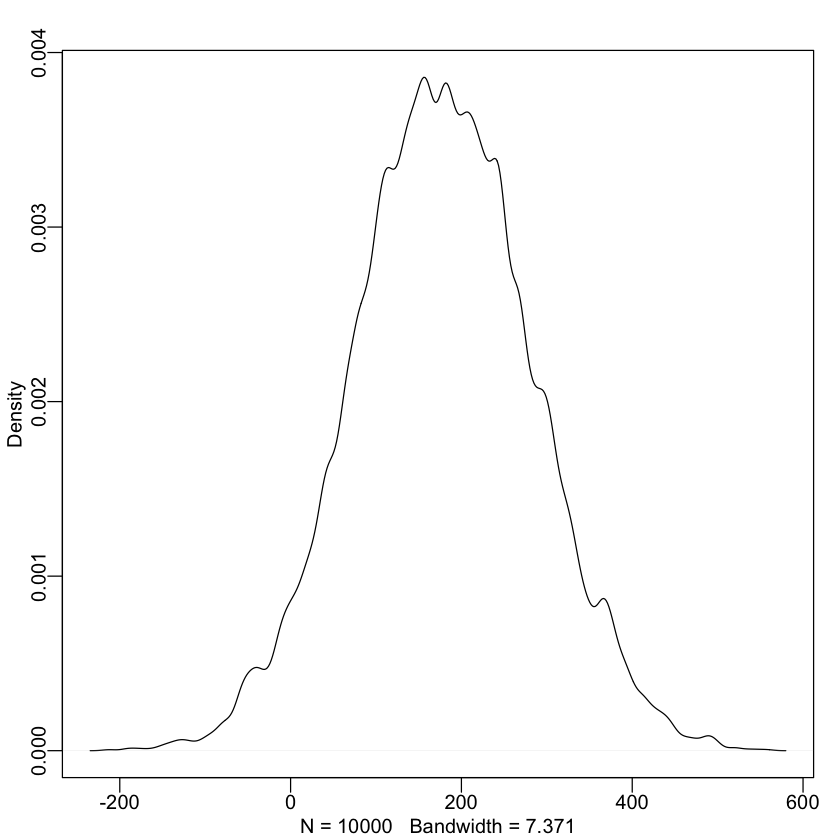

In [19]:
sample_mu <- rnorm(1e4, 178, 100)
prior_h <- rnorm(1e4, sample_mu, sample_sigma)
dens(prior_h)

### grid approximation of the posterior
**target:** find the plausibility (probability) for all the combinations of mu and sigma  
**approach:** approximate the shape of the posterior probability distribution with grid approximation. For each point of the grid, compute 

In [20]:
mu.list <-seq(from=150,to=160,length.out=100)
sigma.list <-seq(from=7,to=9,length.out=100)

#### create grid

In [21]:
post <-expand.grid(mu=mu.list,sigma=sigma.list)

####  compute probability of the data (as sum of all log(p) at each gridpoint)

In [24]:
post$LL <-sapply(1:nrow(post),function(i)sum(dnorm(
  d2$height,
  post$mu[i],
  post$sigma[i],
  log=TRUE)))

#### add priors

In [25]:
post$prod <-post$LL+dnorm(post$mu,178,20,TRUE)+dunif( post$sigma,0,50,TRUE)

In [26]:
# normalize to probabilities

In [27]:
post$prob <-exp(post$prod-max(post$prod))

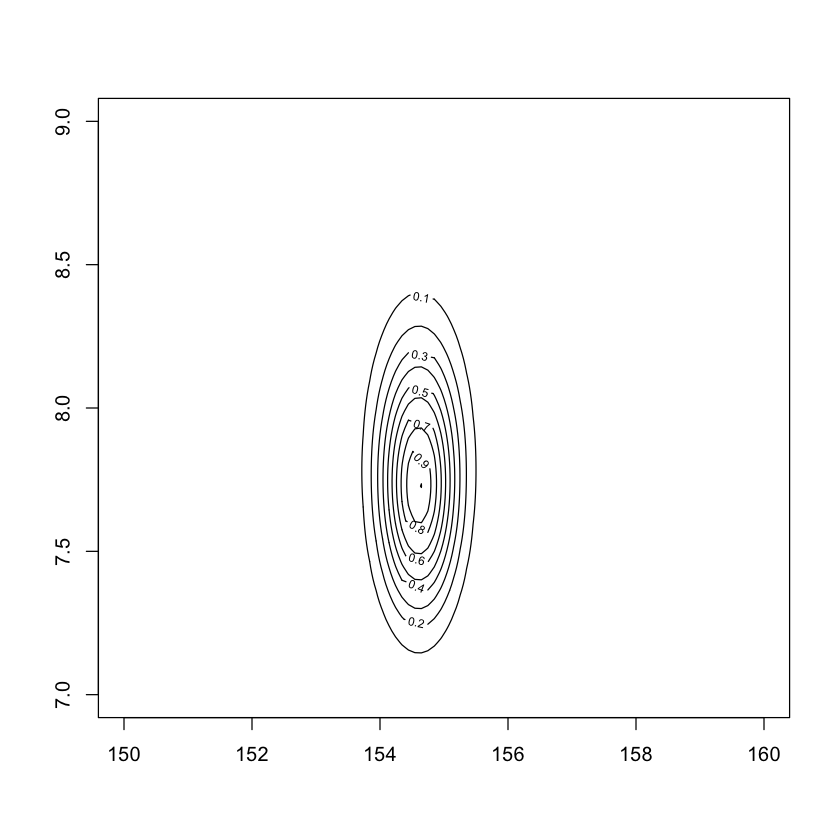

In [30]:
contour_xyz(post$mu, post$sigma, post$prob)

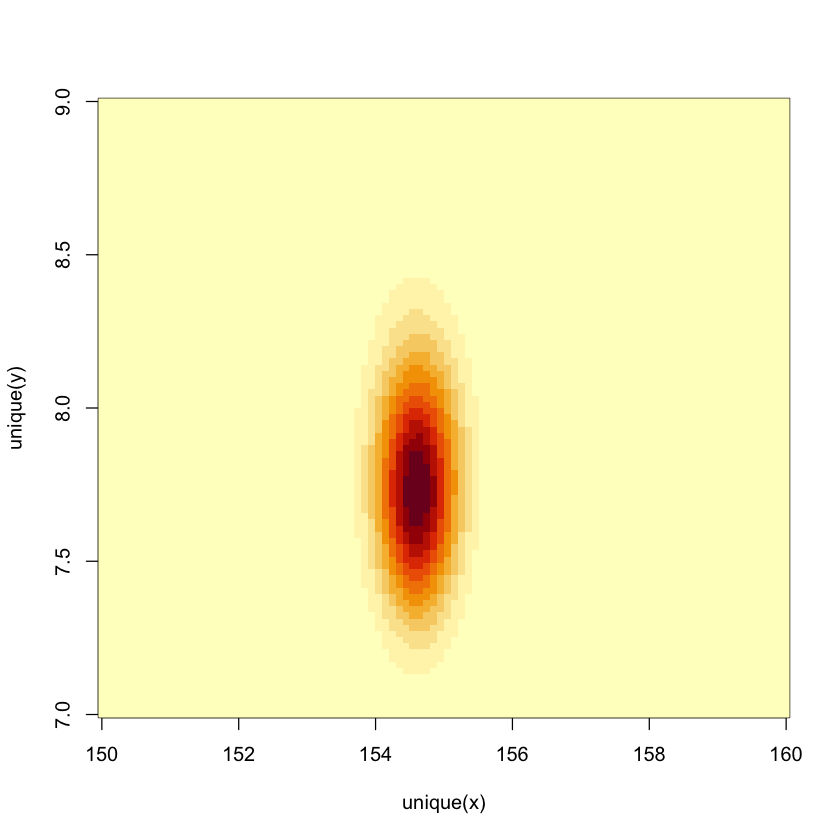

In [29]:
image_xyz(post$mu, post$sigma, post$prob)

the result is an approximate probability distribution for the combinations of mu and sigma on the grid

### sampling from the posterior

In [33]:
sample.rows <-sample(1:nrow(post),size=1e4,replace=TRUE,prob=post$prob )
sample.mu <-post$mu[sample.rows]
sample.sigma <-post$sigma[sample.rows]

In [37]:
#summary(post)

In [39]:
precis(post)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu,1.550000e+02,2.9159105,1.505051e+02,159.4949495,▇▇▇▇▇▇▇▇▇▇
sigma,8.000000e+00,0.5831821,7.101010e+00,8.8989899,▇▇▇▇▇▇▇▇▇▇
LL,-1.245742e+03,22.6696678,-1.288693e+03,-1220.8857624,▁▁▁▁▁▂▂▂▂▃▇▁
prod,-1.254240e+03,22.6306000,-1.296998e+03,-1229.3875402,▁▁▁▁▁▂▂▂▃▃▇▂
prob,3.728678e-02,0.1316224,1.000638e-30,0.2306765,▇▁▁▁▁▁▁▁▁▁


In [38]:
str(post)

'data.frame':	10000 obs. of  5 variables:
 $ mu   : num  150 150 150 150 150 ...
 $ sigma: num  7 7 7 7 7 7 7 7 7 7 ...
 $ LL   : num  -1299 -1296 -1293 -1289 -1286 ...
 $ prod : num  -1308 -1305 -1301 -1298 -1295 ...
 $ prob : num  1.96e-35 5.35e-34 1.36e-32 3.20e-31 7.00e-30 ...
 - attr(*, "out.attrs")=List of 2
  ..$ dim     : Named int [1:2] 100 100
  .. ..- attr(*, "names")= chr [1:2] "mu" "sigma"
  ..$ dimnames:List of 2
  .. ..$ mu   : chr [1:100] "mu=150.0000" "mu=150.1010" "mu=150.2020" "mu=150.3030" ...
  .. ..$ sigma: chr [1:100] "sigma=7.000000" "sigma=7.020202" "sigma=7.040404" "sigma=7.060606" ...


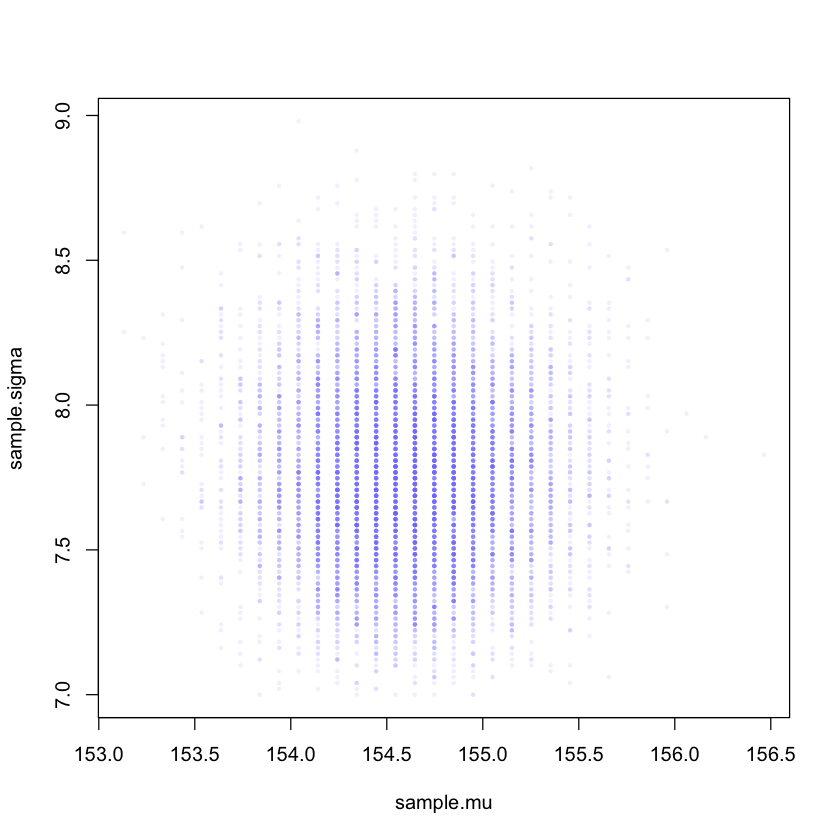

In [40]:
plot(sample.mu,sample.sigma,cex=0.5,pch=16,col=col.alpha(rangi2,0.1))

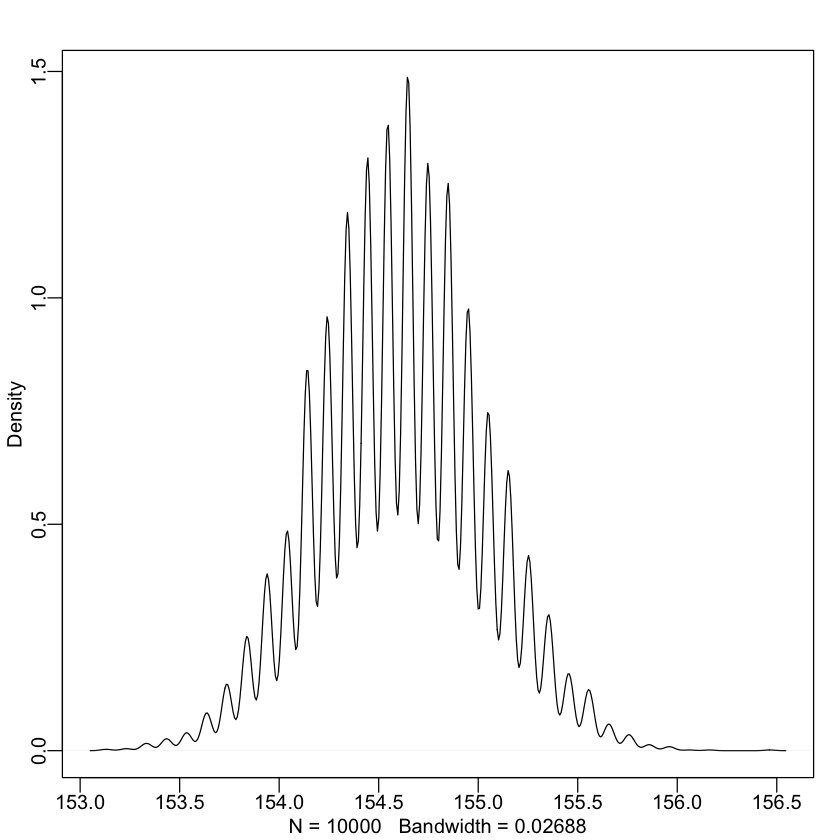

In [41]:
dens(sample.mu)

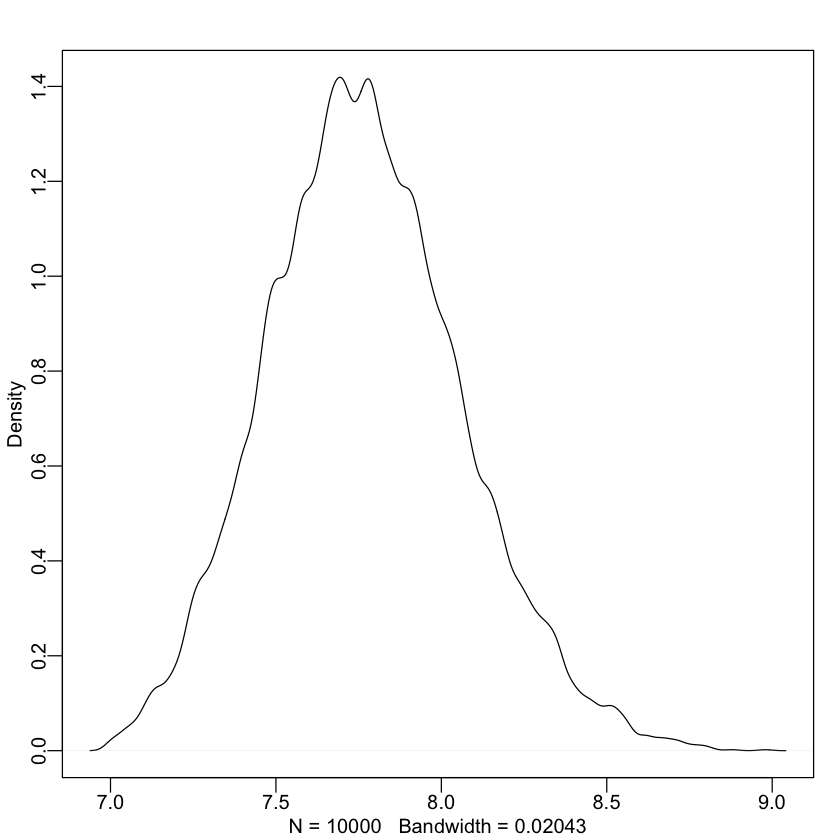

In [42]:
dens(sample.sigma)

#### plausibility intervals

In [48]:
round(PI(sample.mu), 2)

5%    94% 
153.94 155.25

In [49]:
round(PI(sample.sigma), 2)

5%  94% 
7.32 8.27

#### long tail to high variances

In [50]:
d3 <- sample(d2$height, size=20)
mu.list <-seq(from=150,to=170,length.out=200)
sigma.list <-seq(from=4,to=20,length.out=200)
post2 <-expand.grid(mu=mu.list,sigma=sigma.list)

In [51]:
post2$LL <-sapply(1:nrow(post2), function(i) sum(
  dnorm(
    d3, 
    mean=post2$mu[i], 
    sd=post2$sigma[i], 
    log=TRUE )
  ))
post2$prod <-post2$LL + dnorm(post2$mu,178,20,TRUE) + dunif( post2$sigma,0,50,TRUE)
post2$prob <-exp(post2$prod - max(post2$prod))

In [52]:
sample2.rows <-sample(
  1:nrow(post2),
  size=1e4,
  replace=TRUE, 
  prob=post2$prob )
sample2.mu <-post2$mu[sample2.rows]
sample2.sigma <-post2$sigma[sample2.rows]

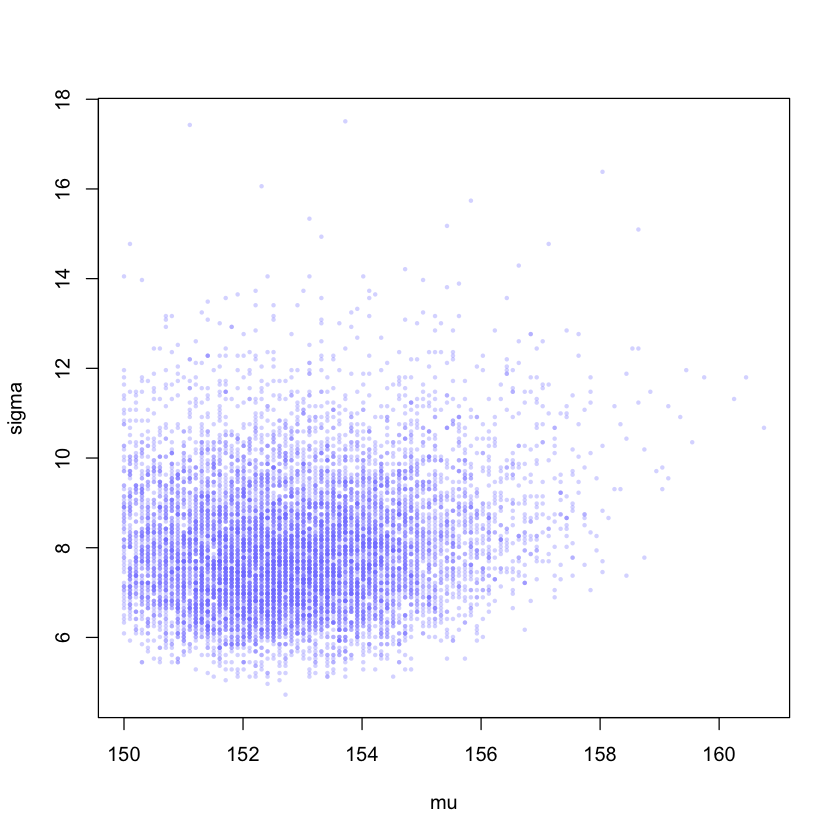

In [53]:
plot( sample2.mu,sample2.sigma,cex=0.5,
      col=col.alpha(rangi2,0.3) ,
      xlab="mu" ,ylab="sigma",pch=16)

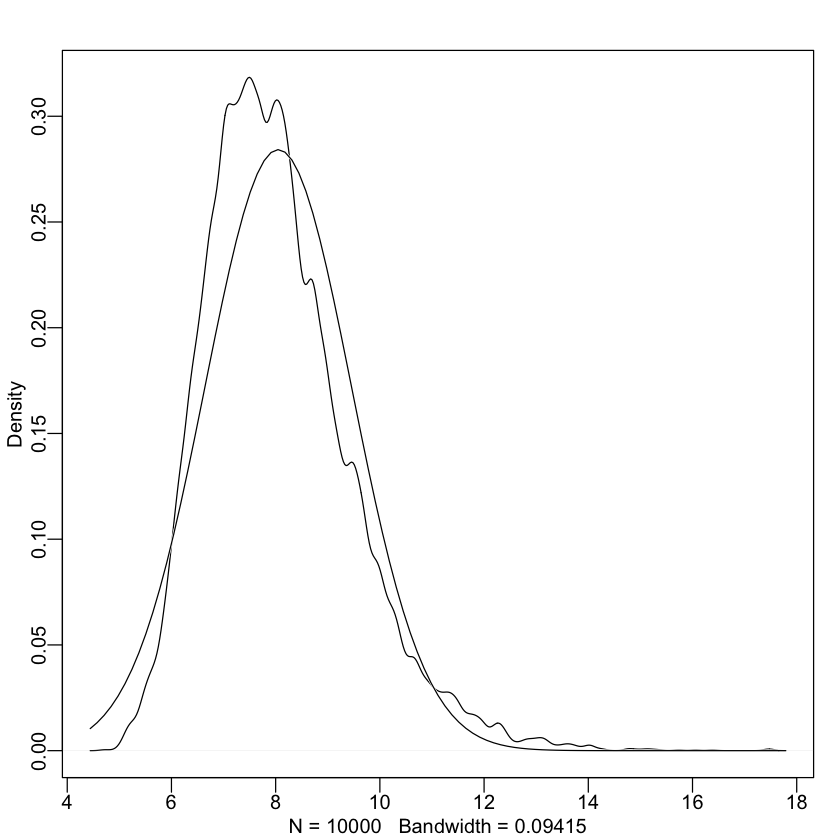

In [54]:
dens( sample2.sigma,norm.comp=TRUE)

## Quadratic Approximation

quadratic approximation of the posterior: again we estimate the posterior based on the data and our prior beliefs. quap very well approximates the shape of the distribution near the maximum

In [55]:
d <-Howell1
d2 <-d[d$age>=18,]

In [56]:
flist <-alist(
  height ~ dnorm(mu,sigma),
  mu ~ dnorm(178,20),
  sigma ~ dunif(0,50)
)

In [57]:
m4.1 <- quap(flist, data=d2)

### changed prior

In [60]:
m4.2 <-quap(
  alist(
    height ~dnorm(mu,sigma),
    mu ~dnorm(178,0.1),
    sigma ~dunif(0,50)
  ) ,data=d2)

In [61]:
precis(m4.2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,177.86377,0.1002354,177.70357,178.02396
sigma,24.51801,0.9289650,23.03335,26.00268


In [62]:
vcov(m4.1)

,mu,sigma
mu,0.1697396159,0.0002180414
sigma,0.0002180414,0.0849058289


In [63]:
diag( vcov(m4.1))

mu      sigma 
0.16973962 0.08490583

In [64]:
cov2cor(vcov(m4.1))

,mu,sigma
mu,1.000000000,0.001816263
sigma,0.001816263,1.000000000


### sampling the posterior

In [65]:
post <-extract.samples(m4.1,n=1e4)

In [66]:
head(post)

,mu,sigma
,<dbl>,<dbl>
1,154.9460,7.759510
2,154.6003,8.091689
3,154.6355,7.377162
4,153.8517,7.092451
5,154.4839,7.855097
6,155.1995,7.762517


In [68]:
precis(post)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
mu,154.607187,0.412996,153.941450,155.271242,▁▁▅▇▂▁▁
sigma,7.729192,0.292367,7.262787,8.196777,▁▁▁▂▅▇▇▃▁▁▁


In [69]:
precis(m4.1)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
mu,154.607024,0.4119947,153.948577,155.265471
sigma,7.731333,0.2913860,7.265642,8.197024


## Adding Weight as Predictor
including weight. previously we only approximated the distribution of heights

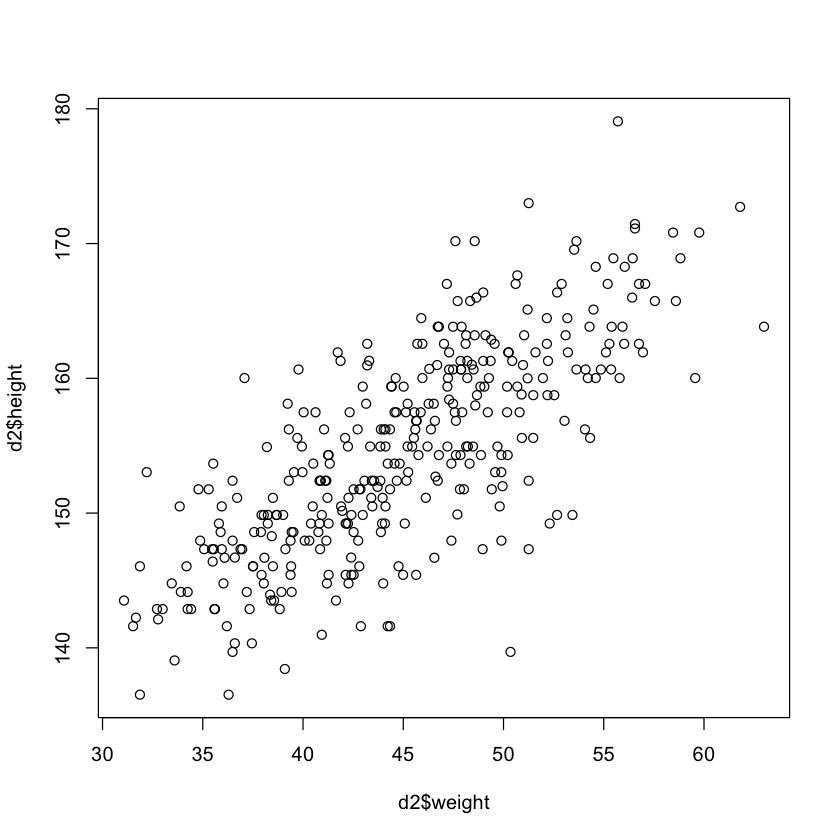

In [70]:
d2 <- d[d$age>=18,]
plot (d2$height~d2$weight)

In [71]:
# sampling and plotting from the prior
m4.3_plot <- function(a, b){
  set.seed(2971)
  N <-100 # 100lines
  plot( 
    NULL,
    xlim=range(d2$weight),
    ylim=c(-100,400), 
    xlab="weight",
    ylab="height")
  abline( h=0,lty=2)
  abline( h=272,lty=1,lwd=0.5)
  mtext( "b~dnorm(0,10)")
  xbar <-mean(d2$weight)
  for (i in 1:N) curve(a[i]+b[i]*(x-xbar),
                    from=min(d2$weight),
                    to=max(d2$weight),
                    add=TRUE,
                    col=col.alpha("black", 0.2))
}

In [73]:
N <- 100

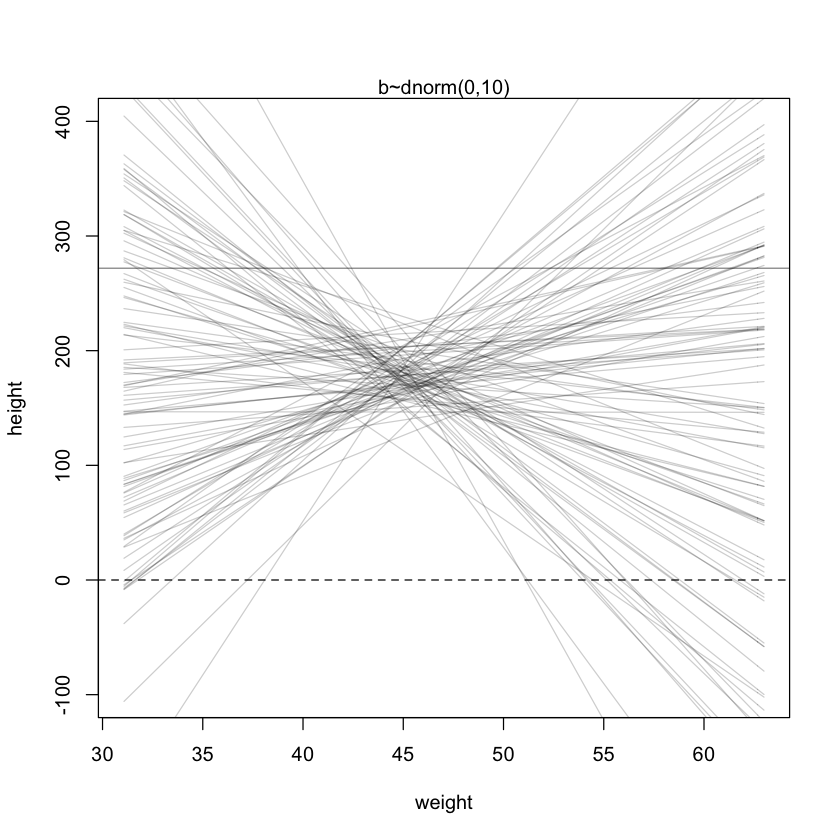

In [74]:
a <-rnorm(N,178,20)
b <-rnorm(N,0,10)
m4.3_plot(a,b)

### correcting the prior for b

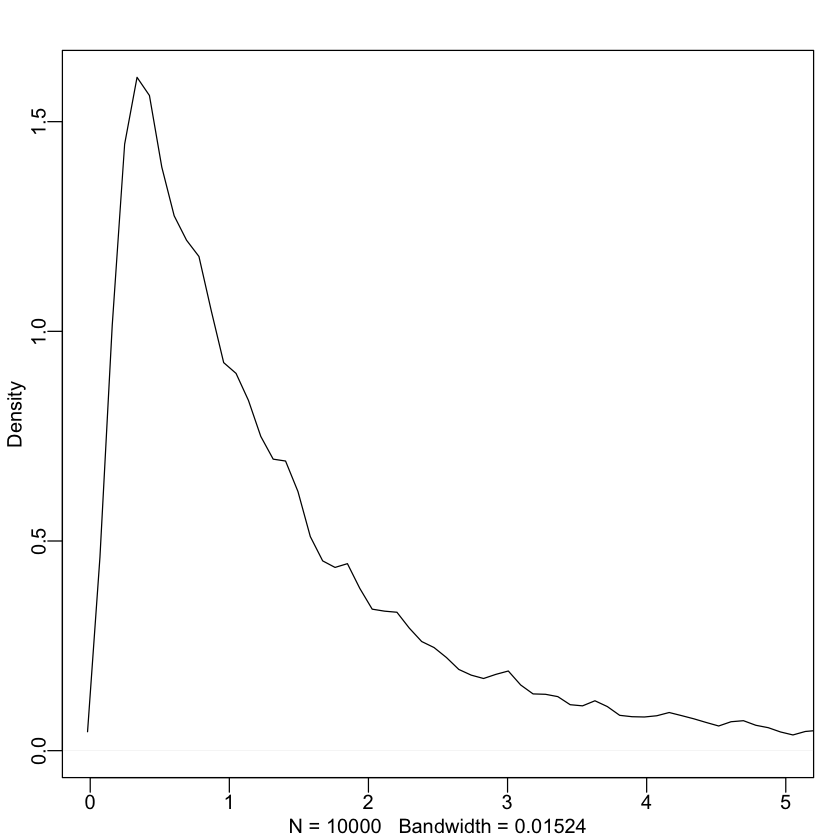

In [75]:
b <-rlnorm(1e4,0,1)
dens(b, xlim=c(0,5), adj=0.1)

lognormal distribution is constrained to positive values

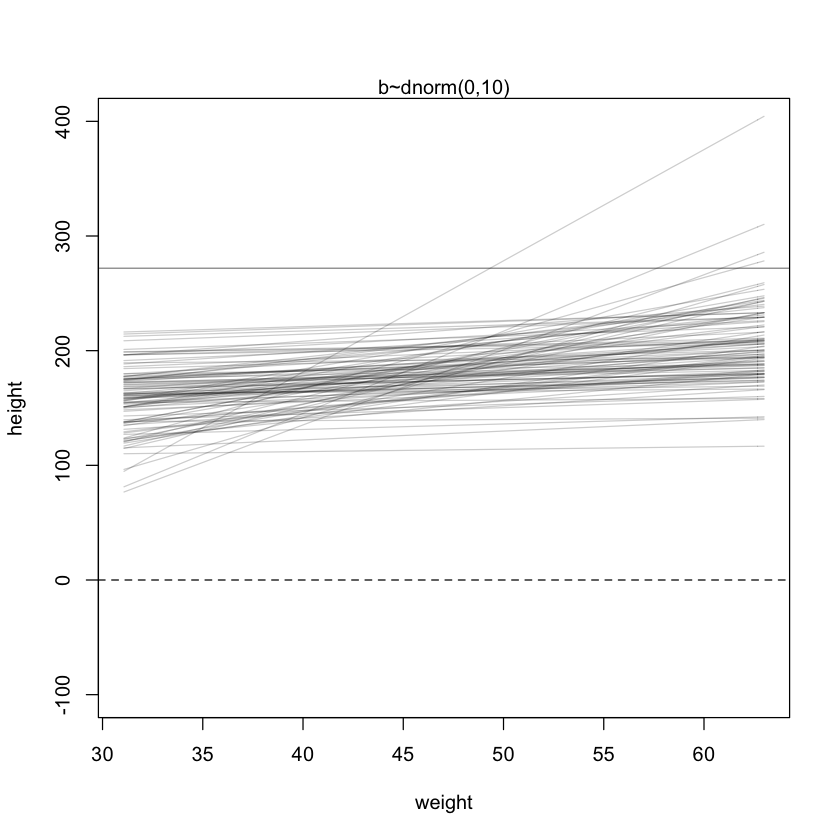

In [76]:
# choosing a different prior for b
b <-rlnorm(N,0,1)
m4.3_plot(a, b)

### finding the posterior

In [77]:
# define the average weight, x-bar

In [78]:
xbar <- mean(d2$weight)

In [79]:
# fit the model
m4.3 <-quap(
  alist(
    height ~ dnorm(mu,sigma),
    mu <- a+b*(weight-xbar),
    a ~ dnorm(178,20),
    b ~ dlnorm(0,1),
    sigma ~ dunif(0,50)
  ) ,data=d2)

In [80]:
precis(m4.3)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,154.601388,0.27031303,154.1693756,155.0334005
b,0.903183,0.04192448,0.8361796,0.9701864
sigma,5.071982,0.19116429,4.7664641,5.3774990


In [81]:
round( vcov(m4.3),3)

,a,b,sigma
a,0.073,0.000,0.000
b,0.000,0.002,0.000
sigma,0.000,0.000,0.037


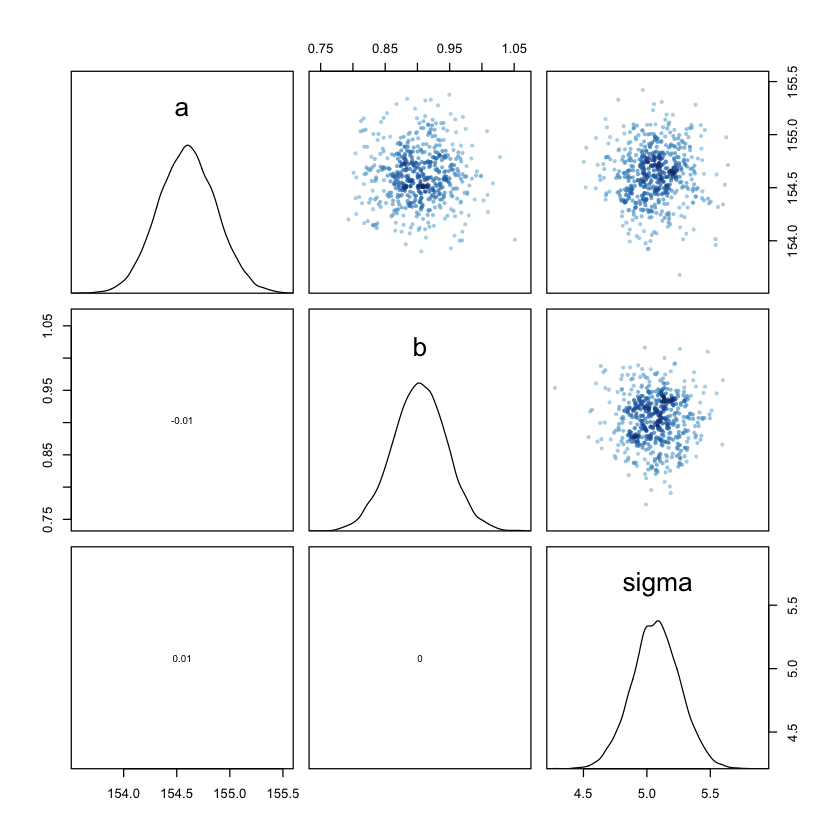

In [82]:
pairs(m4.3)

### sample and plot the posterior mean

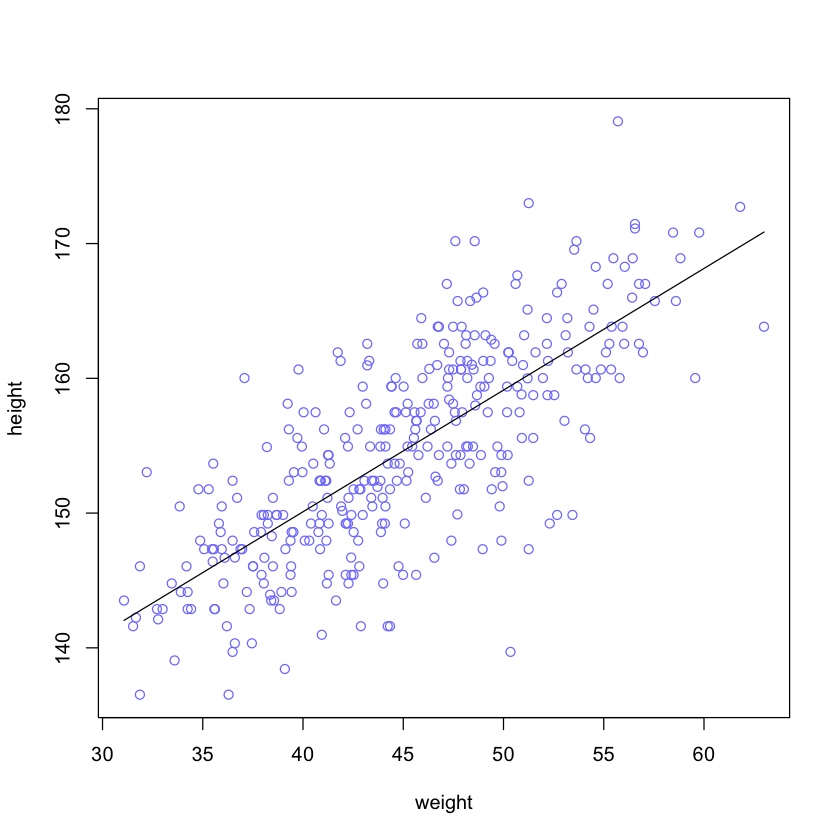

In [84]:
plot(height~weight, data=d2, col=rangi2)
post <-extract.samples(m4.3)
a_map <-mean(post$a)
b_map <-mean(post$b)
curve( a_map+b_map*(x-xbar), add=TRUE)

In [85]:
post <- extract.samples(m4.3)
head(post)

,a,b,sigma
,<dbl>,<dbl>,<dbl>
1,154.4314,0.8867037,4.886076
2,154.5189,0.9247077,5.046411
3,154.2931,0.8792177,5.222871
4,154.5874,0.9432093,5.015039
5,154.6654,0.9442512,5.111840
6,154.7308,0.9134776,4.826429


In [86]:
N <-10
dN <-d2[1:N,]
mN <-quap(
  alist(
    height ~dnorm(mu,sigma),
    mu <-a+b*(weight-mean(weight)),
    a ~dnorm(178,20),
    b ~dlnorm(0,1),
    sigma ~dunif(0,50)
  ) ,data=dN)

In [87]:
# play with the amount of data to show the effect on uncertainty
library(dplyr)
library(rethinking)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [88]:
m4.3_model <- function(N){
  #set.seed(42)
  dN <-d2[1:N,]
  
  # sampling some data
  #dN <- sample_n(d2, size = N, replace=TRUE)
  
  # fitting the model
  mN <-quap(
    alist(
      height ~dnorm(mu,sigma),
      #mu <-a+b*(weight-mean(weight)),
      mu <- a+b*(weight),
      a ~dnorm(178,20),
      b ~dlnorm(0,1),
      sigma ~dunif(0,50)
    ) ,data=dN)
  
  # extract 20 samples from the posterior
  post <- extract.samples(mN, n=20)
  
  # display raw data and sample size
  plot( dN$weight,dN$height,
        xlim=range(d2$weight) ,ylim=range(d2$height),
        col=rangi2 ,xlab="weight",ylab="height")
  
  mtext(concat("N =",N))
  
  # plot the lines, with transparency
  for (i in 1:20)
    curve( post$a[i]+post$b[i]*(x-mean(dN$weight)),
           col=col.alpha("black",0.3) ,add=TRUE)
}

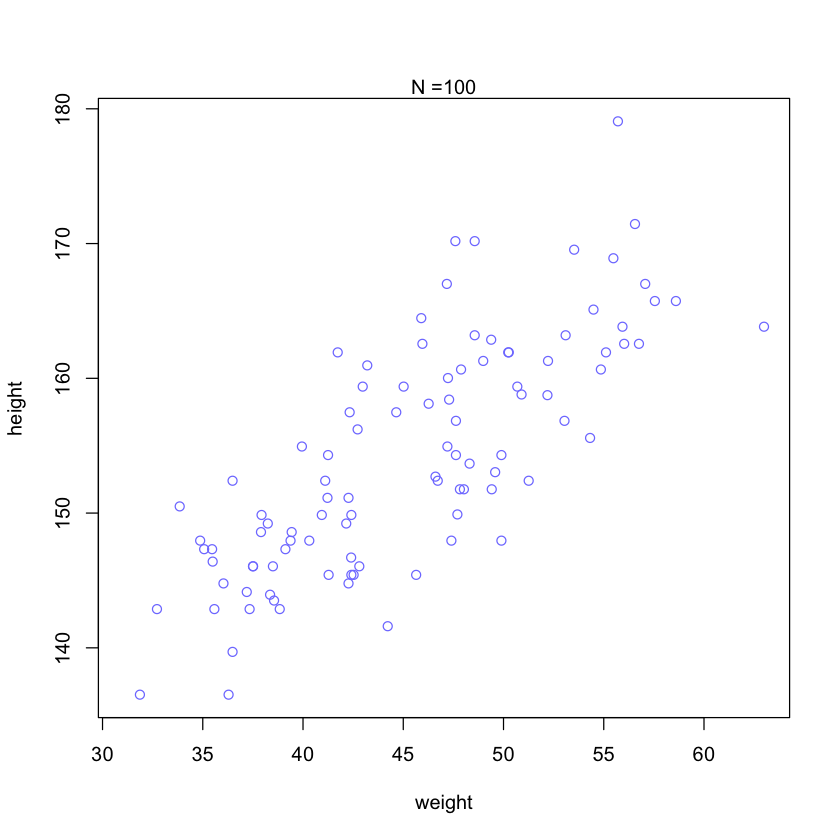

In [89]:
m4.3_model(N=100)

In [90]:
post <- extract.samples(m4.3)

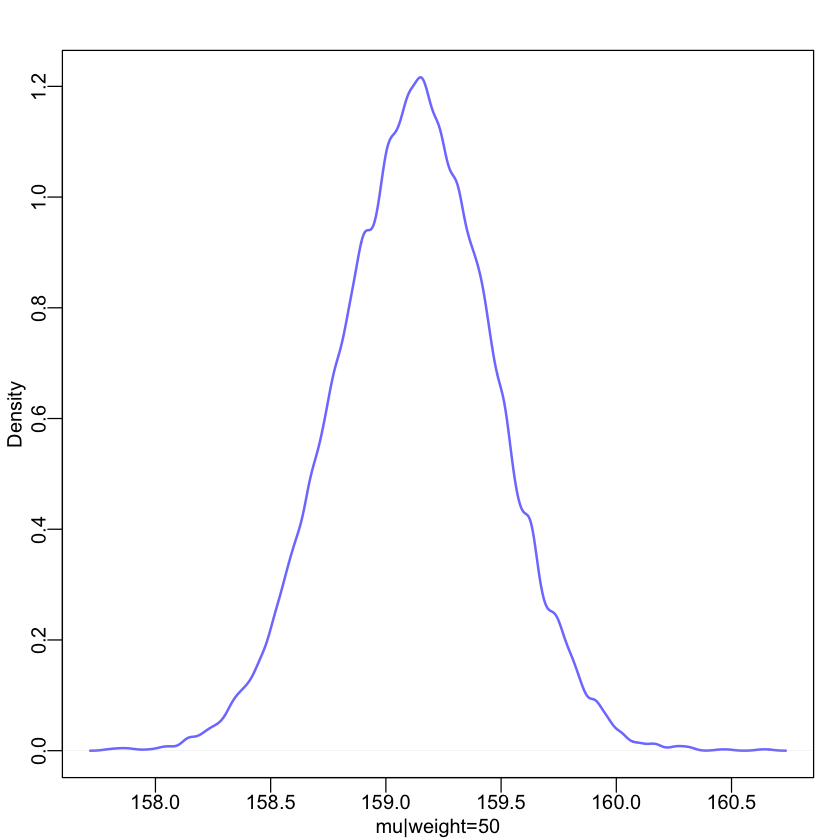

In [91]:
# "predicting" height at a fixed value for weight
mu_at_50 <- post$a+post$b*(50-xbar)
dens( mu_at_50, col=rangi2, lwd=2, xlab="mu|weight=50")

In [92]:
mu <-link(m4.3)
str(mu)

 num [1:1000, 1:352] 157 157 157 157 157 ...


In [93]:
## define sequence of weights to compute predictions for
# these values will be on the horizontal axis

In [94]:
weight.seq <- seq(from=25,to=70,by=1)
# use link to compute mu
# for each sample from posterior
# and for each weight in weight.seq

In [95]:
mu <- link(m4.3, data=data.frame(weight=weight.seq))
str(mu)

post <- extract.samples(m4.3)

 num [1:1000, 1:46] 137 136 138 136 137 ...


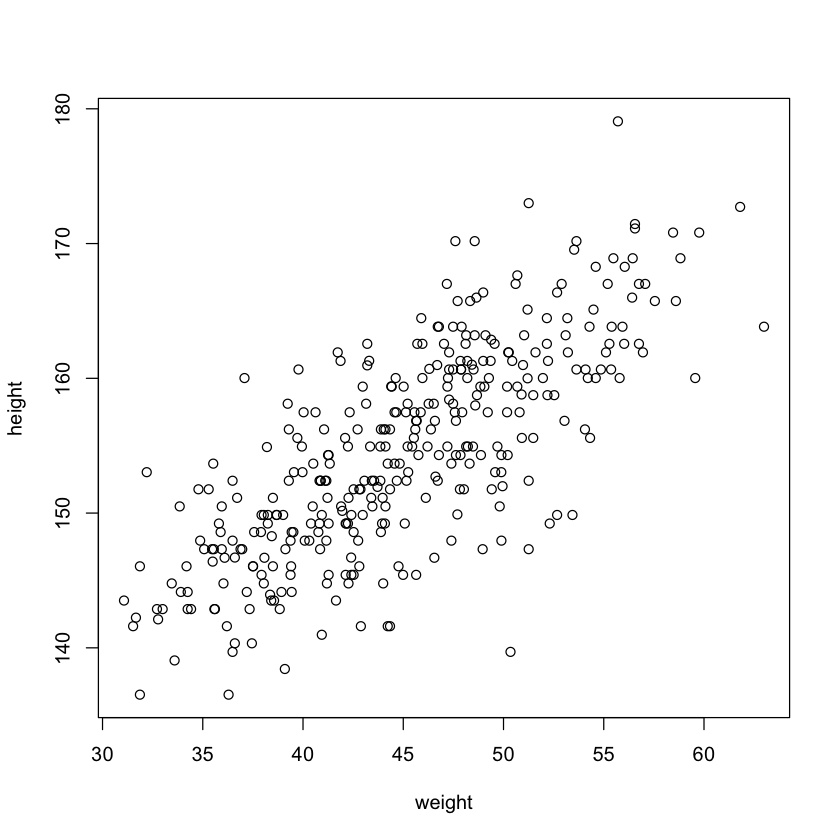

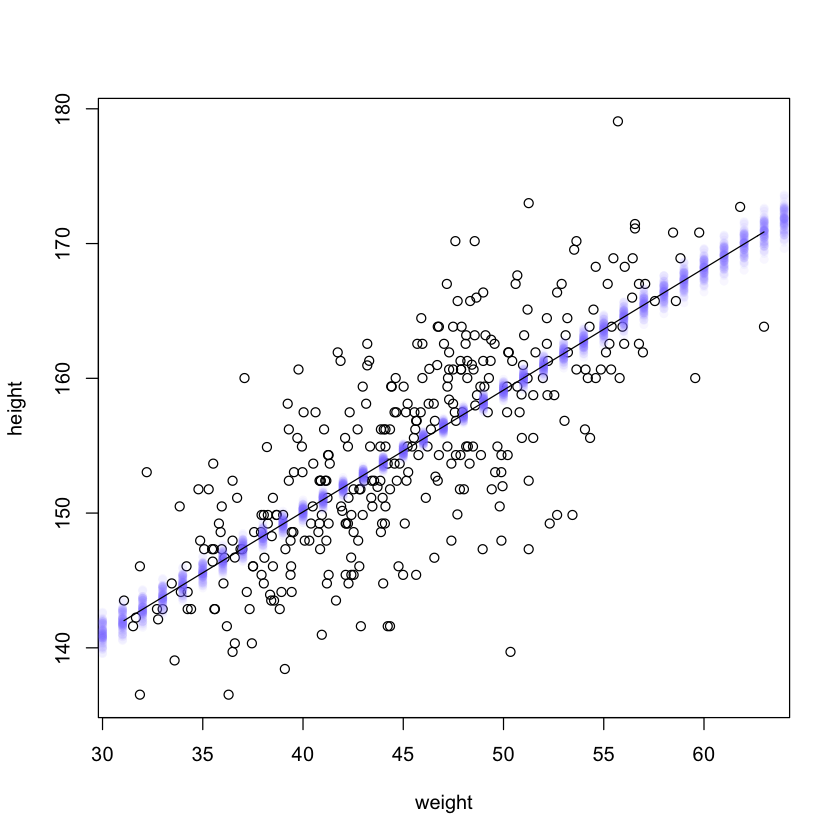

In [98]:
# loop over samples and plot each mu value
# use type="n" to hide raw data
plot( height~weight, d2)
for (i in 1:100)
  points( weight.seq, mu[i,], pch=16,col=col.alpha(rangi2,0.05))
post <-extract.samples(m4.3)
a_map <-mean(post$a)
b_map <-mean(post$b)
curve( a_map+b_map*(x-xbar), add=TRUE)

In [99]:
# summarize distribution of each weight value
mu.mean <-apply(mu,2,mean)
mu.PI <-apply(mu,2,PI,prob=0.89)

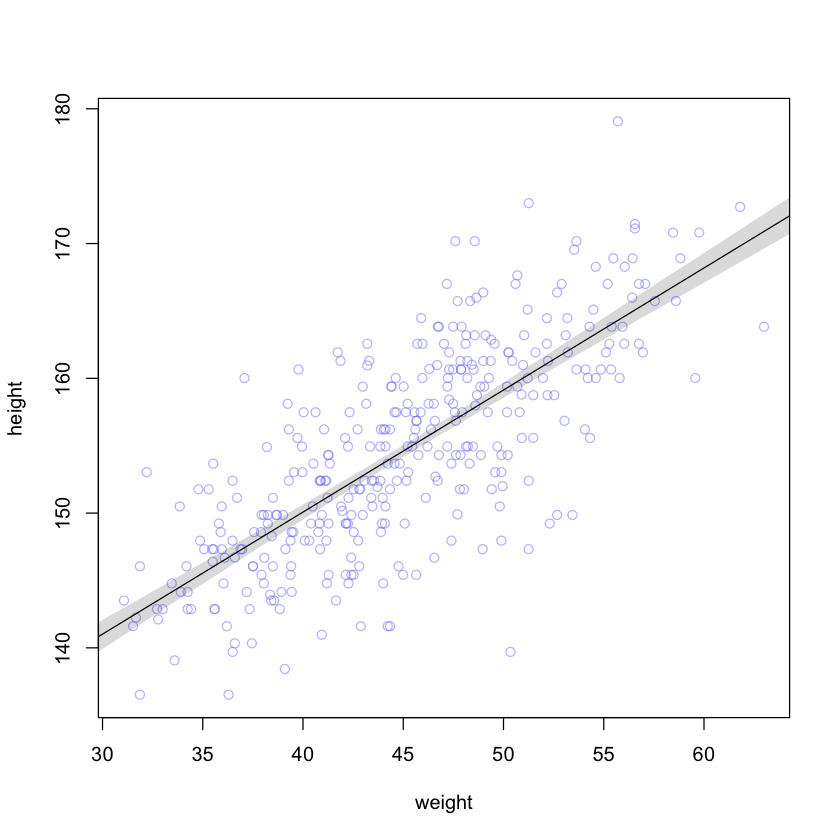

In [100]:
# plot raw data
# fading out points to make line and interval more visible
plot( height~weight,data=d2,col=col.alpha(rangi2,0.5))
# plot the MAP line, aka the mean mu for each weight
lines(weight.seq, mu.mean)
# plot a shaded region for 89% PI
shade(mu.PI, weight.seq)

 num [1:1000, 1:46] 142 138 133 133 139 ...


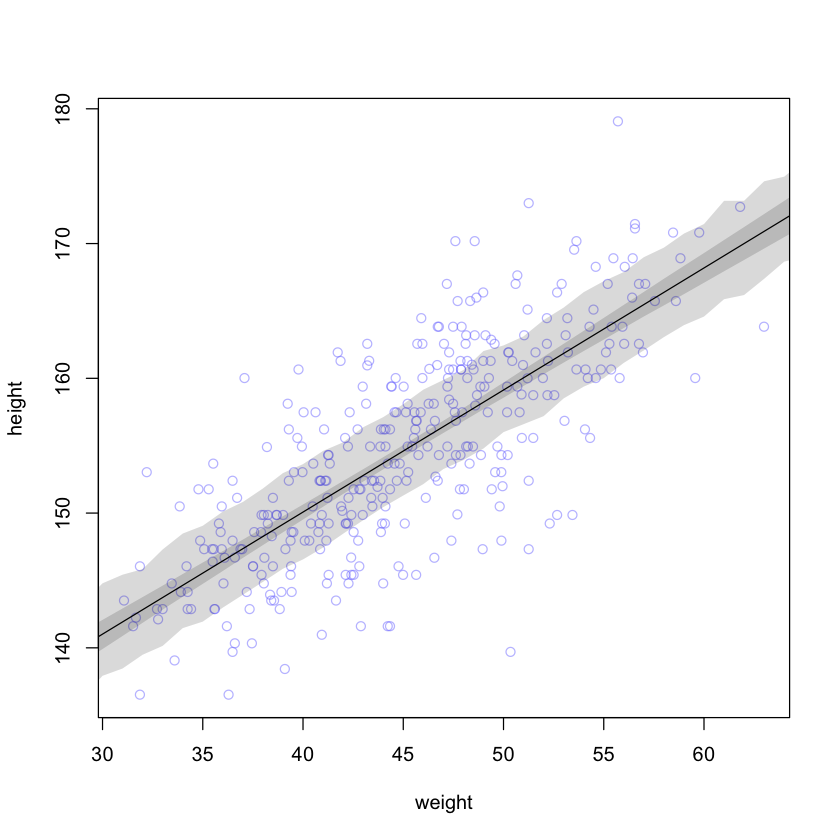

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.394541,0.3099873,145.899121,146.889960
b1,15.219729,0.4762655,14.458564,15.980893
b2,-6.202613,0.2571583,-6.613601,-5.791624
b3,3.583378,0.2287735,3.217754,3.949003
sigma,4.829891,0.1469428,4.595048,5.064734


,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,146.394541,0.3099873,145.899121,146.889960
b1,15.219729,0.4762655,14.458564,15.980893
b2,-6.202613,0.2571583,-6.613601,-5.791624
b3,3.583378,0.2287735,3.217754,3.949003
sigma,4.829891,0.1469428,4.595048,5.064734


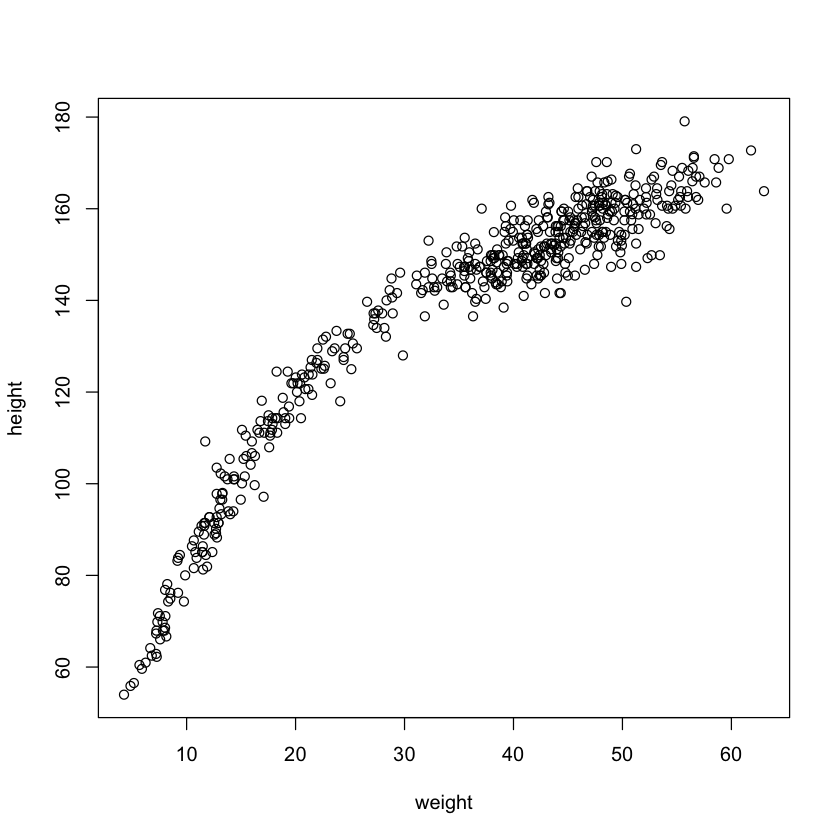

44.22584,57.48376,69.52306,80.41200,90.21882,99.01174,106.8590,113.8289,119.9896,125.4094,⋯,155.6436,157.4952,159.4930,161.7053,164.2003,167.0462,170.3113,174.0639,178.3721,183.3042
44.79496,57.72613,69.51077,80.21000,89.88494,98.59672,106.4065,113.3753,119.5643,125.0347,⋯,155.2578,156.8717,158.5616,160.3886,162.4137,164.6981,167.3030,170.2894,173.7185,177.6514
45.50128,58.61637,70.52172,81.28487,90.97335,99.65469,107.3964,114.2661,120.3312,125.6594,⋯,154.9410,156.6927,158.5853,160.6863,163.0634,165.7839,168.9156,172.5258,176.6821,181.4521
45.11710,58.12116,69.93490,80.62468,90.25685,98.89778,106.6138,113.4713,119.5366,124.8760,⋯,154.6830,156.4882,158.4302,160.5753,162.9900,165.7405,168.8932,172.5144,176.6706,181.4281
45.16078,58.11849,69.91733,80.61974,90.28813,98.98491,106.7725,113.7133,119.8698,125.3043,⋯,155.2879,156.9278,158.6571,160.5384,162.6340,165.0063,167.7178,170.8309,174.4080,178.5115
44.34898,57.41411,69.31049,80.10112,89.84897,98.61700,106.4682,113.4655,119.6720,125.1505,⋯,155.3831,157.0387,158.7851,160.6852,162.8020,165.1985,167.9377,171.0825,174.6959,178.8409
44.20844,57.43433,69.44543,80.30956,90.09453,98.86816,106.6983,113.6527,119.7992,125.2057,⋯,155.2286,157.0441,159.0012,161.1677,163.6113,166.4001,169.6016,173.2839,177.5146,182.3616
44.78033,57.93694,69.87708,80.66959,90.38327,99.08695,106.8494,113.7396,119.8262,125.1781,⋯,155.2401,157.1434,159.2066,161.4986,164.0883,167.0443,170.4355,174.3309,178.7991,183.9090
43.94531,57.25938,69.35736,80.30597,90.17193,99.02196,106.9228,113.9411,120.1437,125.5973,⋯,155.2324,156.9018,158.6896,160.6624,162.8871,165.4302,168.3586,171.7390,175.6381,180.1225
44.60107,57.55288,69.35067,80.05640,89.73199,98.43937,106.2405,113.1973,119.3717,124.8256,⋯,154.9822,156.6216,158.3458,160.2165,162.2958,164.6457,167.3280,170.4046,173.9376,177.9889
43.35512,56.57894,68.61864,79.53786,89.40020,98.26930,106.2088,113.2823,119.5534,125.0857,⋯,155.3794,157.0092,158.7273,160.5973,162.6830,165.0478,167.7555,170.8696,174.4537,178.5716


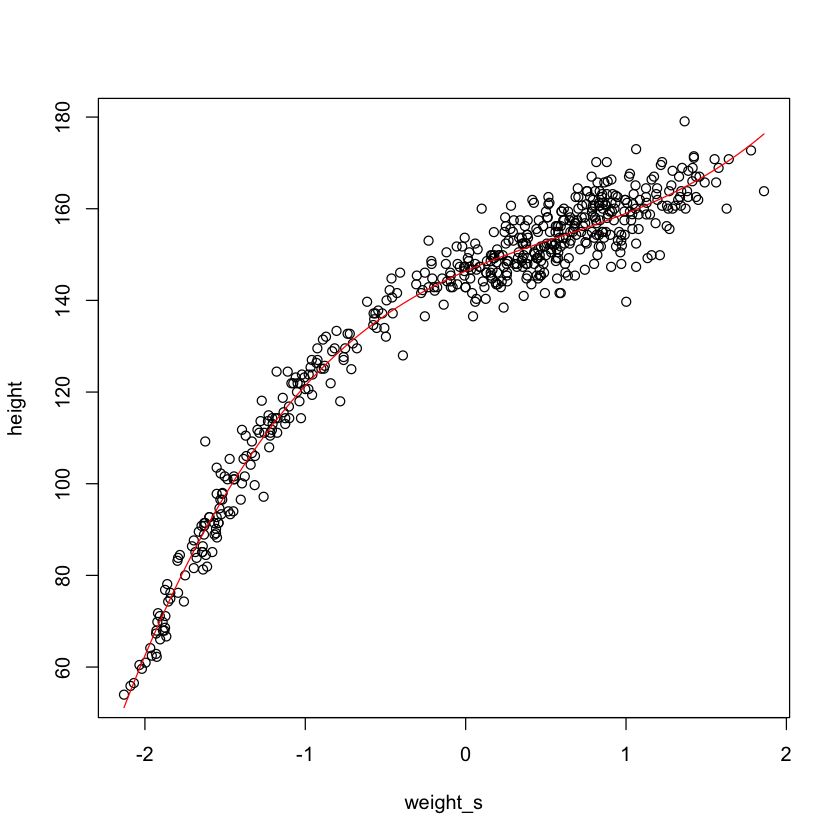

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
year,1408.000000,350.8845964,867.77000,1948.23000
doy,104.540508,6.4070362,94.43000,115.00000
temp,6.141886,0.6636479,5.15000,7.29470
temp_upper,7.185151,0.9929206,5.89765,8.90235
temp_lower,5.098941,0.8503496,3.78765,6.37000


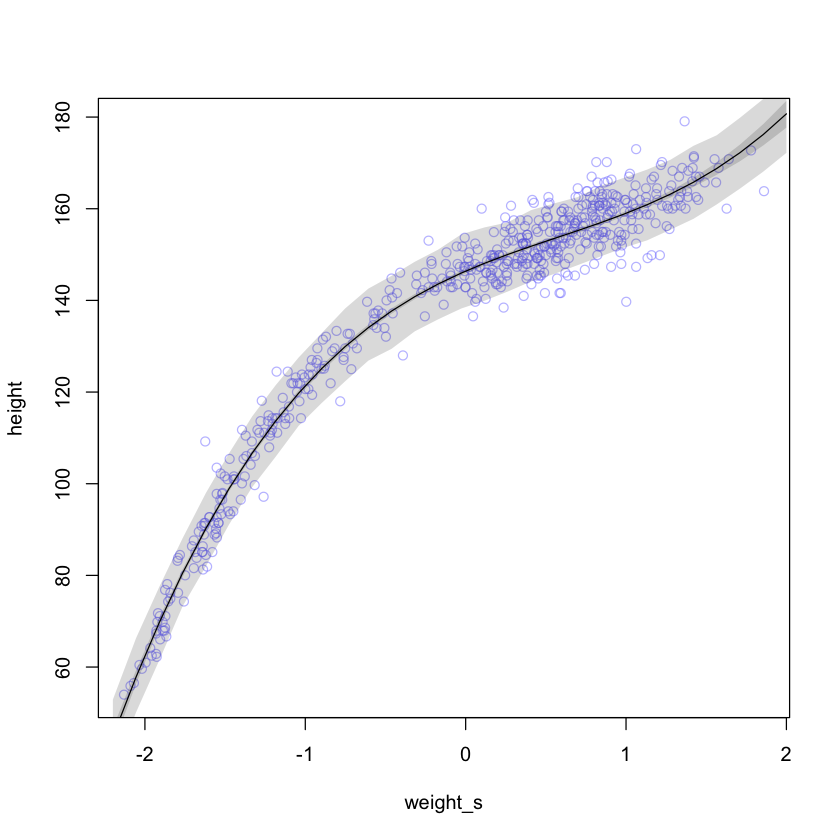

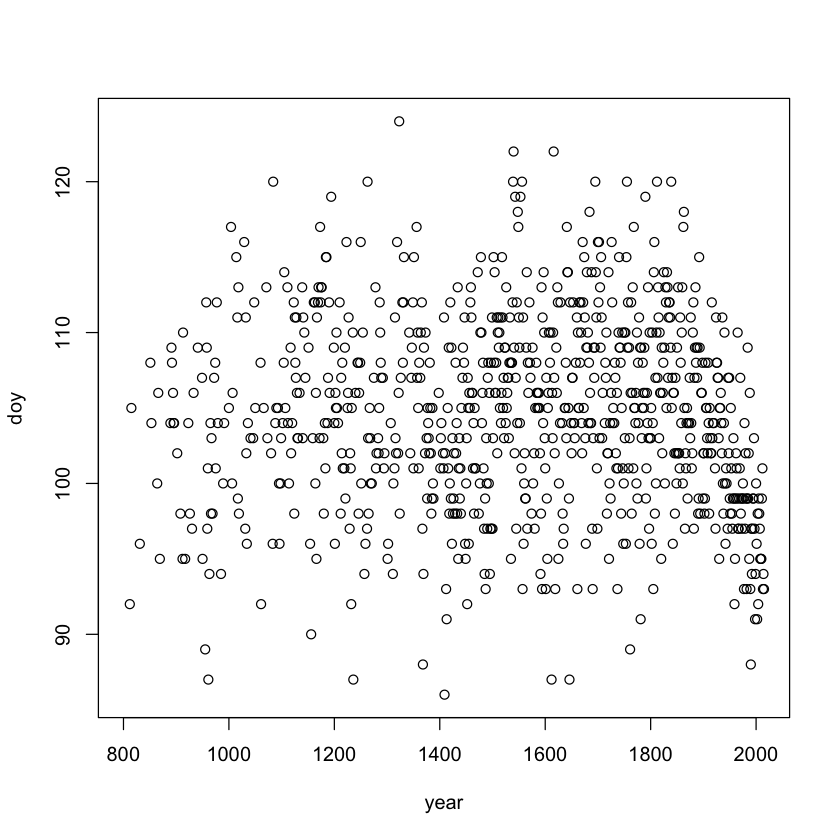

In [101]:
#### Prediction Intervals ####
# simulate posterior observations = simulate 
sim.height <- sim(m4.3, data=list(weight=weight.seq))
str(sim.height)

# 89% posterior prediction interval of observable heights across
# across the values in weight.seq
height.PI <- apply(sim.height, 2, PI, prob=0.5)

# plot raw data
plot(height ~ weight, d2, col=col.alpha(rangi2, .5))
# draw MAP
lines(weight.seq, mu.mean)
# draw HPDI region for line
shade(mu.PI, weight.seq)
# draw PI for simulated heights
shade(height.PI, weight.seq)

# PI for simulated heights: wide shaded region.
# the model expects to find 89% of actual heights in the population in this region

# Compatibility interval: The central 89% of the ways for the model to produce
# the data place the *average X* in this region
# 
# Prediction interval: also incorporates the standard deviation (uncertainty) of height
# 

#### Non-linear relationships ####

# polynomials
library(rethinking)
data(Howell1)
d <- Howell1

plot(height ~ weight, data=d)
d$weight_s <- (d$weight - mean(d$weight))/sd(d$weight)
d$weight_s2 <- d$weight_s^2
d$weight_s3 <- d$weight_s^3

# fitting the quap
m4.5 <- quap(
  alist(
    height ~ dnorm(mu, sigma),
#    mu <- a + b1*weight_s + b2*weight_s2,
    mu <- a + b1*weight_s + b2*weight_s2 + b3 * weight_s3,
    a ~ dnorm(178, 20),
    b1 ~ dlnorm(0,1), 
    b2 ~ dnorm(0,1),
    b3 ~ dnorm(0,1),
    sigma ~ dunif(0, 50)
  ), data=d)
precis(m4.5)
summary(m4.5)

# plotting the mean curves using the estimators
plot(height ~ weight_s, d)
coef <- m4.5@coef
curve(coef[1]+coef[2]*x+coef[3]*x^2+coef[4]*x^3, add=TRUE, col=col.alpha('red', alpha=1))

# generate a grid of values to create preditions for
weight.seq <- seq(from=-2.2, to=2, length.out=30)
pred_dat <- list(weight_s=weight.seq, weight_s2=weight.seq^2, weight_s3=weight.seq^3)
#pred_dat
#weight.seq

# generate distributions of posterior values for mu
mu <- link(m4.5, data=pred_dat)
mu.mean <- apply(mu, 2, mean)
mu.PI <- apply(mu, 2, PI, prob=0.89)
mu 

# simulate posterior observations (considers uncertainty stemming from sigma)
sim.height <- sim(m4.5, data=pred_dat)
height.PI <- apply(sim.height, 2, PI, prob=0.89)

# plot this
plot(height ~ weight_s, d, col=col.alpha(rangi2, .5))
lines(weight.seq, mu.mean)
shade(mu.PI, weight.seq)
shade(height.PI, weight.seq)


#### Splines ####
data("cherry_blossoms")
d <- cherry_blossoms
precis(d, hist=F)

plot(doy~year, data=d)